분석환경 설정

In [1]:
import copy
import os
import sys
import pickle

from IPython.display import clear_output
"""
__FILE_DIR_PATH = os.path.dirname(__vsc_ipynb_file__) \
    if __IPYTHON__ \
    else os.path.dirname(__file__)
    
WORKSPACE_HOME = __FILE_DIR_PATH.replace(
    f"/ipynb/{os.path.basename(__FILE_DIR_PATH)}", "")
WORKSPACE_HOME = WORKSPACE_HOME.replace("/trunk", "")

print(WORKSPACE_HOME)
"""
WORKSPACE_HOME = os.path.abspath("../..")
sys.path.append(WORKSPACE_HOME)
DATASET_DIR_HOME = f"{WORKSPACE_HOME}/data/colley"
LOCAL_STORAGE_HOME_PATH = f"{WORKSPACE_HOME}"
SUB_STORAGE_HOME_PATH = "/data/tghwang"

import numpy as np
from pandas import DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from core import *
from ipirec import *
from colley import *

plt.rcParams["font.family"] = "NanumGothic"
mpl.rcParams["axes.unicode_minus"] = False

DATE_STR = DirectoryPathValidator.current_datetime_str().split("_")[0].strip()
"""YYYYMMDD"""
TIME_STR = DirectoryPathValidator.current_datetime_str().split("_")[1].strip()
"""HHMMSS"""
_FIG_DIR_HOME_PATH = f"{WORKSPACE_HOME}/trunk/obs/{DATE_STR}"
if not DirectoryPathValidator.exist_dir(_FIG_DIR_HOME_PATH):
    DirectoryPathValidator.mkdir(_FIG_DIR_HOME_PATH)

/Users/metaltuna/git_repo/ipirec
/Users/metaltuna/git_repo/ipirec


관측할 변수들 구성

In [2]:
# BIN_HOME_PATH = SUB_STORAGE_HOME_PATH
BIN_HOME_PATH = LOCAL_STORAGE_HOME_PATH

FOLD_SET_NO = 0
MODEL_NAME = "IPIRec_Rev2"
"""
220472
745701
771058
773697
774879: 81,94,95
나 (764602)
"""
user_id = 774879
TOP_N_ITEMS = 17

BIN_HOME_PATH = f"{BIN_HOME_PATH}/resources"
_BIN_REC_FILE_PATH = str.format(
    "{0}/{1}/{2}/{3}.bin",
    BIN_HOME_PATH,
    MODEL_NAME,
    ScoreBasedRecommender.__name__,
    FOLD_SET_NO,
)
if not os.path.exists(_BIN_REC_FILE_PATH):
    print(_BIN_REC_FILE_PATH)
    raise FileNotFoundError()

추천기로 모델재현

In [3]:
_recommender: ScoreBasedRecommender = None
with open(_BIN_REC_FILE_PATH, "rb") as fin:
    _recommender: ScoreBasedRecommender = pickle.load(fin)
    fin.close()
if _recommender == None:
    raise NotImplementedError()
_estimator: IPIRecEstimatorSeries2 = _recommender._estimator
_model: IPIRecModelSeries2 = _estimator.model
_model._dataset._data_root_path = DATASET_DIR_HOME
__TEST_SET = BaseAction.load_collection(
    _model._dataset.kfold_file_path(
        FOLD_SET_NO,
        DecisionType.E_PURCHASE,
        False,
        )
    )
# list(_model.user_dict.keys())

[IO] /Users/metaltuna/git_repo/ipirec/data/colley/test_0_purchase_list.csv


[LOAD] test_0_purchase_list.csv: 100%|██████████| 469/469 [00:00<00:00, 12650.02it/s]


# TAGS SCORES

S

heatmap

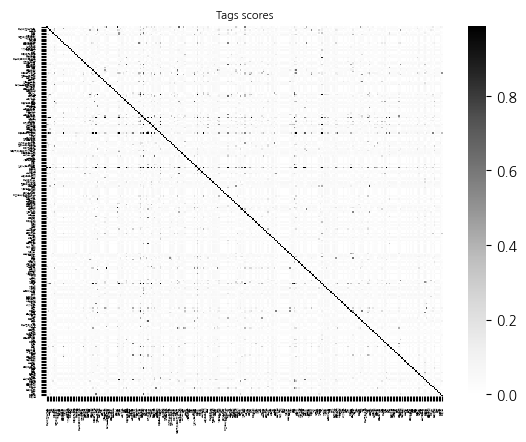

In [4]:
_tags_score: np.ndarray = copy.deepcopy(_estimator.arr_tags_score)
plt.title(label="Tags scores", fontsize=8.0)

_min = np.min(_tags_score)
_max = np.max(_tags_score[_tags_score < 1.0])
_tag_names_list = list(_estimator.tags_dict.keys())

plt.xlabel(xlabel="Source tags name", fontsize=4.0)
plt.ylabel(ylabel="Target tags name", fontsize=4.0)
plt.xticks(fontsize=2.0)
plt.yticks(fontsize=2.0)
ax = sns.heatmap(
    data=_tags_score,
    vmin=_min,
    vmax=_max,
    cmap="Grays",
    xticklabels=_tag_names_list,
    yticklabels=_tag_names_list,
)

_fig_file_path = str.format(
    "{0}/set{1}_S_hmap.svg",
    _FIG_DIR_HOME_PATH,
    FOLD_SET_NO,
)
__fig_dir_path = os.path.dirname(_fig_file_path)
if not os.path.exists(__fig_dir_path):
    DirectoryPathValidator.mkdir(__fig_dir_path)

ax.figure.savefig(_fig_file_path)
# plt.show()

clustermap

/opt/anaconda3/envs/cfEnv/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/anaconda3/envs/cfEnv/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


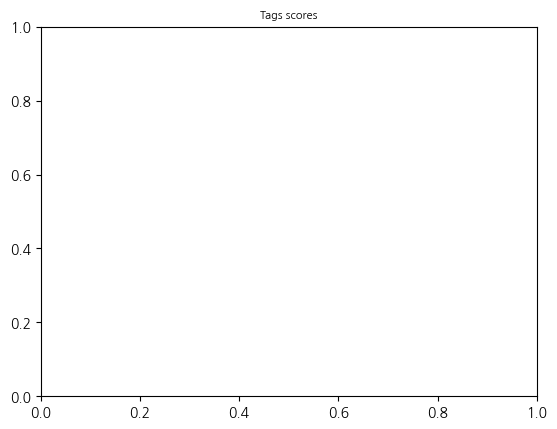

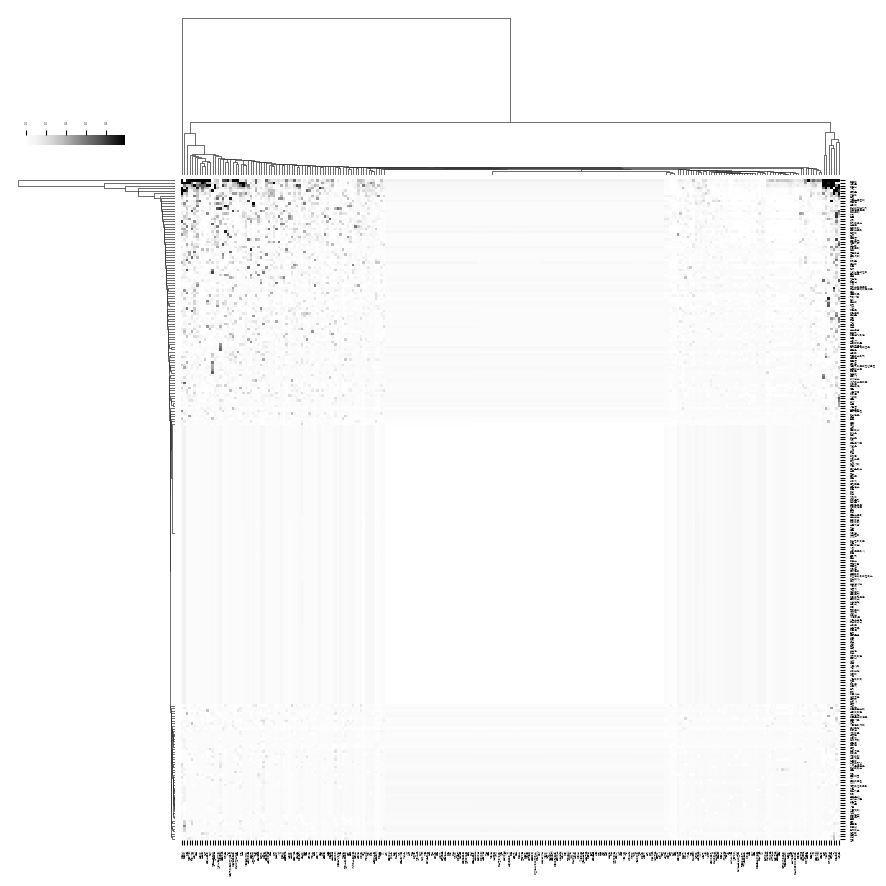

In [5]:
_tags_score: np.ndarray = copy.deepcopy(_estimator.arr_tags_score)
plt.title(label="Tags scores", fontsize=8.0)

_min = np.min(_tags_score)
_max = np.max(_tags_score[_tags_score < 1.0])
_tag_names_list = list(_estimator.tags_dict.keys())

tags_count = _estimator.tags_count
for _ in range(tags_count):
    _tags_score[_][_] = 0.0
ax = sns.clustermap(
    _tags_score,
    vmin=_min,
    vmax=_max,
    cmap="Grays",
    xticklabels=_tag_names_list,
    yticklabels=_tag_names_list,
    ## defaults
    # cbar_kws=dict(use_gridspec=False, location="top"),
    # cbar_pos=(0.02, 0.8, 0.05, 0.18),
    cbar_kws=dict(use_gridspec=False, location="top"),
    cbar_pos=(0.03, 0.85, 0.1, 0.01),
    ## (pos_x, pos_y, len_x, len_y)
)
ax.tick_params(axis="x", labelsize=2.0)
ax.tick_params(axis="y", labelsize=2.0)

_fig_file_path = str.format(
    "{0}/set{1}_S_cmap.svg",
    _FIG_DIR_HOME_PATH,
    FOLD_SET_NO,
)
__fig_dir_path = os.path.dirname(_fig_file_path)
if not os.path.exists(__fig_dir_path):
    DirectoryPathValidator.mkdir(__fig_dir_path)

ax.figure.savefig(_fig_file_path)
# plt.show()

# W (redraw )

heatmap

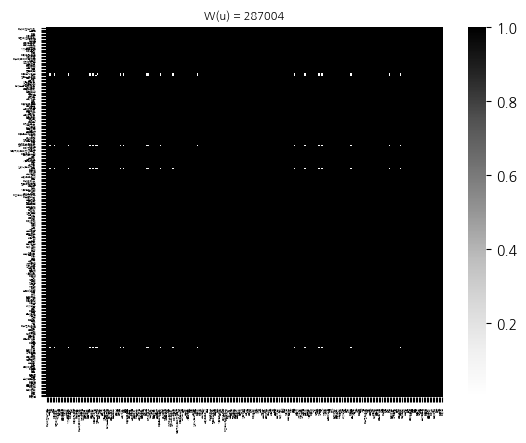

In [6]:
## HIER_HEATMAP

"""
220472
745701
771058
773697
774879: 81,94,95
나 (771058)
"""
user_id = 287004

_users_dist: np.ndarray = copy.deepcopy(_estimator.arr_user_idx_to_weights)
plt.title(label=f"W(u) = {user_id}", fontsize=8.0)

uidx = _estimator.user_id_to_idx[user_id]
if _estimator.user_id_to_idx.get(user_id, -1) == -1:
    raise KeyError()

__OBS_W: np.ndarray = _users_dist[uidx]
_min = np.min(__OBS_W)
_max = np.max(__OBS_W)
_tag_names_list = list(_estimator.tags_dict.keys())

plt.xlabel(xlabel="Source tags name", fontsize=4.0)
plt.ylabel(ylabel="Target tags name", fontsize=4.0)
plt.xticks(fontsize=2.0)
plt.yticks(fontsize=2.0)
ax = sns.heatmap(
    data=__OBS_W,
    vmin=_min,
    vmax=_max,
    cmap="Grays",
    xticklabels=_tag_names_list,
    yticklabels=_tag_names_list,
)

_fig_file_path = str.format(
    "{0}/set{1}_W_u{2}_hmap.svg",
    _FIG_DIR_HOME_PATH,
    FOLD_SET_NO,
    user_id,
)
__fig_dir_path = os.path.dirname(_fig_file_path)
if not os.path.exists(__fig_dir_path):
    DirectoryPathValidator.mkdir(__fig_dir_path)

ax.figure.savefig(_fig_file_path)
# plt.show()

clustermap

/opt/anaconda3/envs/cfEnv/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/anaconda3/envs/cfEnv/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


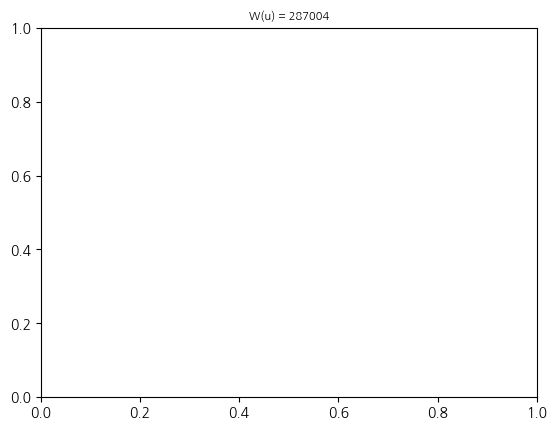

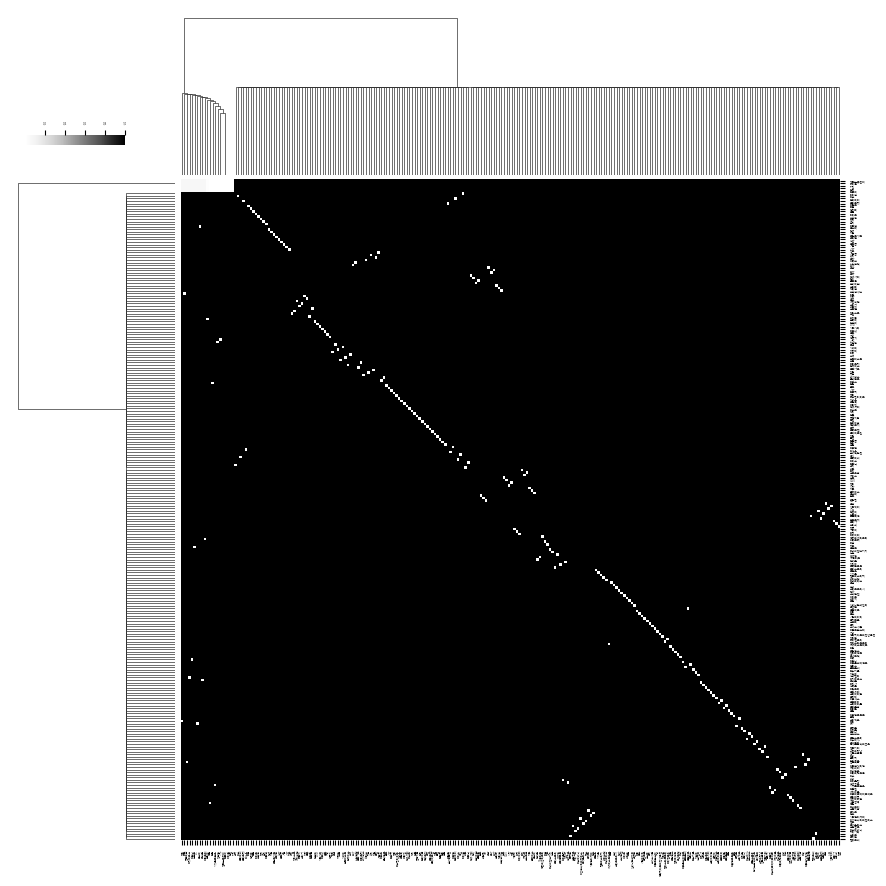

In [7]:
## HIER_HEATMAP
_users_dist: np.ndarray = copy.deepcopy(_estimator.arr_user_idx_to_weights)
plt.title(label=f"W(u) = {user_id}", fontsize=8.0)

uidx = _estimator.user_id_to_idx[user_id]
if _estimator.user_id_to_idx.get(user_id, -1) == -1:
    raise KeyError()

__OBS_W: np.ndarray = _users_dist[uidx]
_min = np.min(__OBS_W)
_max = np.max(__OBS_W)
_tag_names_list = list(_estimator.tags_dict.keys())

tags_count = _estimator.tags_count
for _ in range(tags_count):
    __OBS_W[_][_] = 0.0
ax = sns.clustermap(
    __OBS_W,
    vmin=_min,
    vmax=_max,
    cmap="Grays",
    xticklabels=_tag_names_list,
    yticklabels=_tag_names_list,
    ## defaults
    # cbar_kws=dict(use_gridspec=False, location="top"),
    # cbar_pos=(0.02, 0.8, 0.05, 0.18),
    cbar_kws=dict(use_gridspec=False, location="top"),
    cbar_pos=(0.03, 0.85, 0.1, 0.01),
    ## (pos_x, pos_y, len_x, len_y)
)
ax.tick_params(axis="x", labelsize=2.0)
ax.tick_params(axis="y", labelsize=2.0)

_fig_file_path = str.format(
    "{0}/set{1}_W_u{2}_cmap.svg",
    _FIG_DIR_HOME_PATH,
    FOLD_SET_NO,
    user_id,
)
__fig_dir_path = os.path.dirname(_fig_file_path)
if not os.path.exists(__fig_dir_path):
    DirectoryPathValidator.mkdir(__fig_dir_path)

ax.figure.savefig(_fig_file_path)
# plt.show()

W(u) * S

heatmap

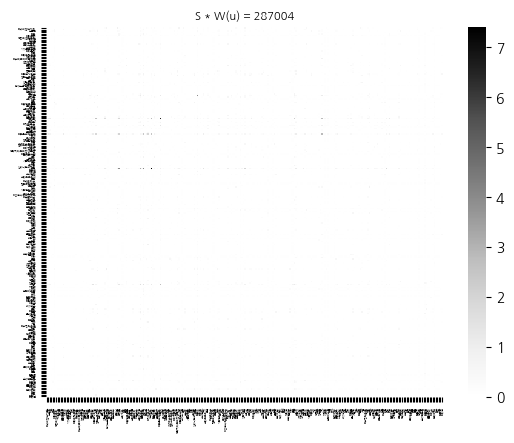

In [8]:
## HEATMAP
_tags_score: np.ndarray = copy.deepcopy(_estimator.arr_tags_score)
_tag_names_list = list(_estimator.tags_dict.keys())

tags_count = _estimator.tags_count
plt.title(label=f"S * W(u) = {user_id}", fontsize=8.0)

uidx = _estimator.user_id_to_idx[user_id]
if _estimator.user_id_to_idx.get(user_id, -1) == -1:
    raise KeyError()

_users_dist: np.ndarray = copy.deepcopy(_estimator.arr_user_idx_to_weights)
__OBS_W: np.ndarray = _users_dist[uidx]

for _ in range(tags_count):
    _tags_score[_][_] = 0.0
    __OBS_W[_][_] = 0.0

_WS = _tags_score * __OBS_W
_min = np.min(_WS)
_max = np.max(_WS)

plt.xlabel(xlabel="Source tags name", fontsize=4.0)
plt.ylabel(ylabel="Target tags name", fontsize=4.0)
plt.xticks(fontsize=2.0)
plt.yticks(fontsize=2.0)
ax = sns.heatmap(
    data=_WS,
    vmin=_min,
    vmax=_max,
    cmap="Grays",
    xticklabels=_tag_names_list,
    yticklabels=_tag_names_list,
)
ax.tick_params(axis="x", labelsize=2.0)
ax.tick_params(axis="y", labelsize=2.0)

_fig_file_path = str.format(
    "{0}/set{1}_WS_u{2}_hmap.svg",
    _FIG_DIR_HOME_PATH,
    FOLD_SET_NO,
    user_id,
)
__fig_dir_path = os.path.dirname(_fig_file_path)
if not os.path.exists(__fig_dir_path):
    DirectoryPathValidator.mkdir(__fig_dir_path)

ax.figure.savefig(_fig_file_path)
# plt.show()

clustermap

/opt/anaconda3/envs/cfEnv/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/opt/anaconda3/envs/cfEnv/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


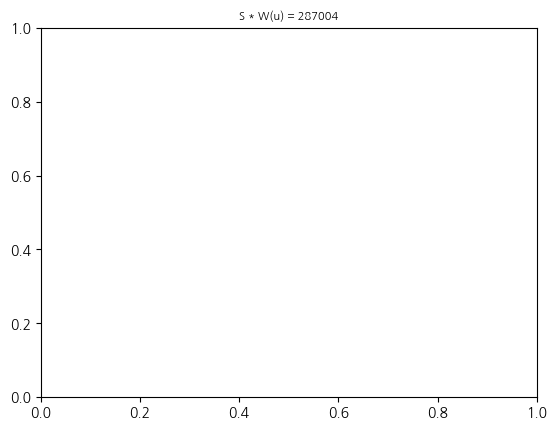

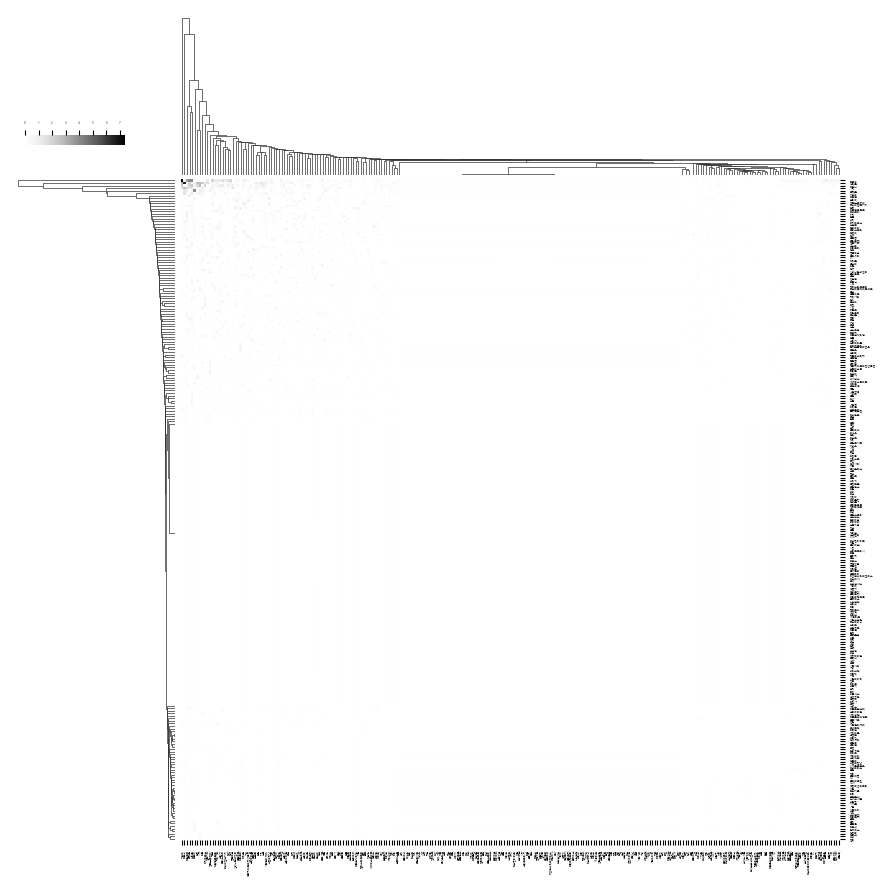

In [9]:
## HIER_HEATMAP
_tags_score: np.ndarray = copy.deepcopy(_estimator.arr_tags_score)
_tag_names_list = list(_estimator.tags_dict.keys())

tags_count = _estimator.tags_count
plt.title(label=f"S * W(u) = {user_id}", fontsize=8.0)

uidx = _estimator.user_id_to_idx[user_id]
if _estimator.user_id_to_idx.get(user_id, -1) == -1:
    raise KeyError()

_users_dist: np.ndarray = copy.deepcopy(_estimator.arr_user_idx_to_weights)
__OBS_W: np.ndarray = _users_dist[uidx]

for _ in range(tags_count):
    _tags_score[_][_] = 0.0
    __OBS_W[_][_] = 0.0

_WS = _tags_score * __OBS_W
_min = np.min(_WS)
_max = np.max(_WS)
ax = sns.clustermap(
    _WS,
    vmin=_min,
    vmax=_max,
    cmap="Grays",
    xticklabels=_tag_names_list,
    yticklabels=_tag_names_list,
    ## defaults
    # cbar_kws=dict(use_gridspec=False, location="top"),
    # cbar_pos=(0.02, 0.8, 0.05, 0.18),
    cbar_kws=dict(use_gridspec=False, location="top"),
    cbar_pos=(0.03, 0.85, 0.1, 0.01),
    ## (pos_x, pos_y, len_x, len_y)
)
ax.tick_params(axis="x", labelsize=2.0)
ax.tick_params(axis="y", labelsize=2.0)

_fig_file_path = str.format(
    "{0}/set{1}_WS_u{2}_cmap.svg",
    _FIG_DIR_HOME_PATH,
    FOLD_SET_NO,
    user_id,
)
__fig_dir_path = os.path.dirname(_fig_file_path)
if not os.path.exists(__fig_dir_path):
    DirectoryPathValidator.mkdir(__fig_dir_path)

ax.figure.savefig(_fig_file_path)
# plt.show()

Positive decisions

In [10]:
for inst in [_ for _ in __TEST_SET if _.user_id == user_id]:
    inst: BaseAction
    if not inst.item_id in _recommender.item_dict:
        continue
    item: ItemEntity = _recommender.item_dict[inst.item_id]
    print(f"{item.item_id}, {item.item_name}, {item.tags_set}")

Recommended items

In [11]:
user: UserEntity = _estimator.user_dict[user_id]
user.estimated_items_score_list
_orded_items = sorted(
    user.estimated_items_score_list,
    key=lambda x:x.estimated_score,
    reverse=True,
    )[:TOP_N_ITEMS]

print("interest_tags: ")
print(user.set_of_interest_tags)
print("decisioned tags:")
for k, v in user.dict_of_interaction_tags.items():
    print(f"{k}: {v}")
print()
print("recommended items:")
_ = 0
for inst in _orded_items:
    # item: ItemEntity = _estimator.item_dict[inst.item_id]
    # print(f"[{_}/{TOP_N_ITEMS}] {inst.item_id}: {inst.estimated_score}, {item.item_name}")
    inst: BaseAction
    item: ItemEntity = _estimator.item_dict.get(inst.item_id, None)
    if item != None:
        _ += 1
        print(
            str.format(
                "[{0}/{1}] {2}: {3}, {4}",
                _,
                TOP_N_ITEMS,
                inst.item_id,
                inst.estimated_score,
                item.item_name,
            )
        )
# end : for (top_n_items)

interest_tags: 
{'가챠', '짱구는못말려'}
decisioned tags:
view: {'키링', '디즈니', '아이돌', '짱구는못말려', '장난감', '인형', '랜덤', '미키마우스', '건담', '동물의숲', '반다이', '피규어', '가챠', '카카오프렌즈', '닌텐도', '젤다', '레고'}
like: {'인형', '동물의숲', '반다이', '닌텐도', '짱구는못말려', '아이돌', '랜덤', '미키마우스', 'DC', '키링', '디즈니', '장난감', '루니툰', '레고', '피규어', '포스터', '건담', '해리포터', '가챠', '카카오프렌즈', '젤다'}
purchase: {'짱구는못말려', '피규어', '건담'}

recommended items:
[1/17] 42547: 1.7042218169481906, ?️
[2/17] 43172: 0.28194254937144403, ??
[3/17] 39781: 0.1739161922412173, 비즈 키링୧ ‧₊˚ ☁️
[4/17] 41776: 0.1739161922412173, 호가든로제 굿즈.무알콜맥주
[5/17] 38139: 0.037913481606562424, I am 영롱이에요
[6/17] 38165: 0.037913481606562424, 할로윈 인스팅몰리 ❤️
[7/17] 42794: 0.037913481606562424, 푸키푸키 베이비?
[8/17] 42958: 0.037913481606562424, 오버워치
[9/17] 44302: 0.037913481606562424, 침대 헤드에서 낚시하는중? 뭘 낚는거지?
[10/17] 39826: 0.007554357518424528, 짱구 소꿉놀이 피규어
[11/17] 39988: 0.007554357518424528, 중복 유리의 공습 ㅜㅜ
[12/17] 40018: 0.007554357518424528, 훈이랑 짱구 데리고와???
[13/17] 44119: 0.007554357518424528, 카스카베 방범대 짱